# ISTAによるスパース信号再現

このノートブックでは、ISTAによるスパース信号再現を試します。

## 必要なパッケージのインポート

In [2]:
import torch
import math
import matplotlib.pyplot as plt

## グローバル定数の設定

In [3]:
m = 256 # 観測ベクトル次元
n = 512 # 元信号ベクトル次元
sigma = 0.1 # 雑音の標準偏差
p     = 0.05 # 元信号の非ゼロ元の生起確率
A = torch.normal(torch.zeros(m, n), std = 1.0) # 観測行列

## スパースベクトル生成関数
* 1 $\times$ n のスパースベクトルを返す。
* 非ゼロ要素は確率$p$で生起する
* 比ゼロ要素の中身は、平均0, 分散1のガウス分布に従う

In [4]:
def gen_sp_vec():
    seq = torch.normal(torch.zeros(n), 1.0) # ガウス乱数ベクトルの生成
    support = torch.bernoulli(p * torch.ones(n)) # 非ゼロサポートの生成
    return seq * support # 要素ごとの積(アダマール積)になることに注意

## 試しにスパースベクトルを生成してみる

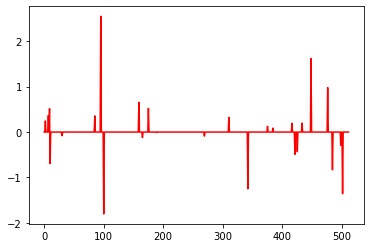

In [5]:
x = gen_sp_vec()
plt.plot(range(n), x, color="red")

## ISTA

In [6]:
beta = 0.001
tau = beta

# 縮小関数 (ソフトしきい値関数)
def shrinkage(x, lam): 
        return (x-lam)*(x-lam > 0).float() + (x + lam)*(x+lam < 0).float()

def ISTA(num_itr):
    s = torch.zeros(n) # 初期ベクトル
    for i in range(num_itr):
        r = s + beta * A.t()@(y - A@s) # @は普通の行列・ベクトル積
        s = shrinkage(r, tau) 
    return s

## 試験スパース再現

スパース信号再現を行い、その結果をプロットする

In [7]:
max_itr = 1000 # ISTAの反復回数
x = gen_sp_vec()
w = torch.normal(torch.zeros(m), sigma)
y = A @ x + w
s = ISTA(max_itr)

## 元スパース信号の表示

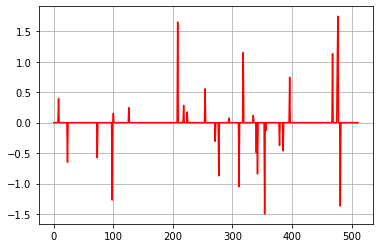

In [8]:
plt.grid()
plt.plot(range(n), x, color="red")

## 雑音ベクトルの表示

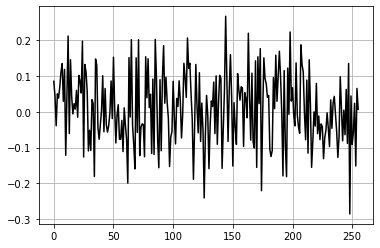

In [9]:
plt.grid()
plt.plot(range(m), w, color="black")

## 観測ベクトルの表示

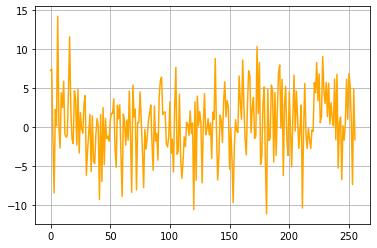

In [10]:
plt.grid()
plt.plot(range(m), y, color="orange")

## 再現信号の表示

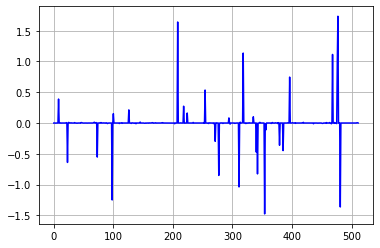

In [11]:
plt.grid()
plt.plot(range(n), s, color="blue")

## 重ねて表示

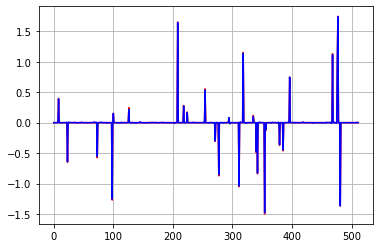

In [12]:
plt.grid()
plt.plot(range(n), x, color="red")
plt.plot(range(n), s, color="blue")

## 演習問題 5-1

上記のコードを実行しつつ、内容を理解せよ。この問題についてはレポートによる報告は必要ない。

## 演習問題 5-2

反復回数 max_itr を変えてみて、結果がどうなるか観察せよ。その観察結果を文章にまとめ、そのような観察結果が得られた理由について考察せよ。


## 演習問題 5-3

max_itr=1000として実行するものとする。pの値を変えてみて(スパース性を変える)
結果がどうなるか観察せよ。その観察結果を文章にまとめよ。

## 演習問題 5-4

max_itr=1000, p = 0.05として実行するものとする。sigmaの値を変えてみて(雑音ベクトルの分散を変える)結果がどうなるか観察せよ。その観察結果を文章にまとめよ。

